<a href="https://colab.research.google.com/github/SamChakra45/BAIN-24/blob/main/A1_220947.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Suppose you have a jar with 4 jelly beans: 2 are strawberry-flavored, 1 is blueberry-flavored, and 1 is cinnamon-flavored. You draw one jelly bean at random from the jar.

    a. What is the sample space for this experiment?

    b. We define event A as the jelly bean drawn is strawberry-flavored and event B as The jelly bean drawn is not cinnamon-flavored. What are the probabilities of events A and B?

    c. Are events A and B mutually exclusive? Why or why not?


```
Q1. a. The Sample space S = {Strawberry,Blueberry,Cinnamon}

    b. P(A) = 0.5  P(B) = 0.75

    c. No, events A and B are not mutually exclusive as P(AUB) = 0.5 which is not equal to P(A)*P(B) = 0.375. We can conclude by observation as well,
    seeing the event of selecting strawberry is common to both A and B.
```

 Q2. Previously, we defined a **Python function P** to compute the probability of an event using the naive definition of probability. Generalize that function to compute the probability of events when they are
 not all equally likely. Use this new function to compute the probability of events A and B from the previous exercise.

 Hint: you can pass a third argument with the probability of each event.

In [ ]:
# Setting up the dependencies: (DO NOT EDIT THE LINES BELOW)
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1

In [ ]:
# Import necessary libraries
import arviz as az  # For Bayesian data analysis and visualization
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
from scipy.special import binom, beta  # For binomial and beta distributions
import preliz as pz # defining priors
from cycler import cycler
import math

In [ ]:
def P(S, A, F): # A = event , S = sample space , F = dictionary probability of each event in sample space
    if set(A).issubset(set(S)): # set A is an event
      sum = 0
      for event in set(A):
        prob_event = F[event]
        sum += prob_event
      return sum
    else:
        return 0

Q3.  Use PreliZ to explore different parameters for the Gaussian distributions. Use the methods `plot_pdf`, `plot_cdf`, and `plot_interactive`. We discussed the probability mass/density functions and the cumulative density function. But there are other ways to represent functions like the percentile point function ppf. Using the `plot_ppf` method of PreliZ, plot the percentile point function for the BetaBinomial and Gaussian distributions. Can you explain how the ppf is related to the cdf and pmf/pdf?

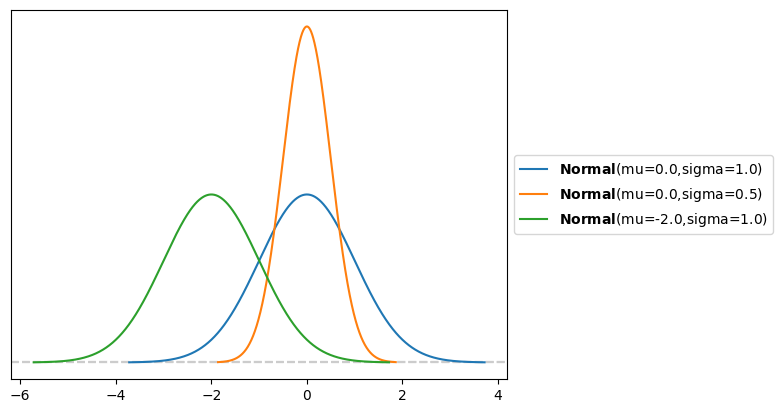

In [ ]:
mus = [0., 0., -2.]
sigmas = [1, 0.5, 1]
for mu, sigma in zip(mus, sigmas):
    ax = pz.Normal(mu, sigma).plot_pdf()

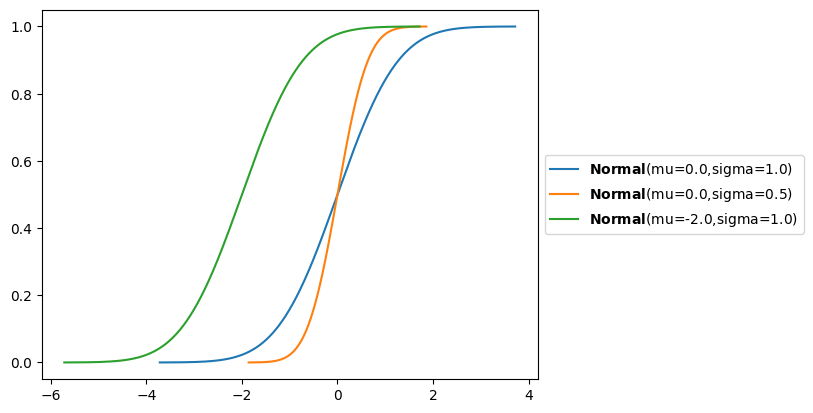

In [ ]:
mus = [0., 0., -2.]
sigmas = [1, 0.5, 1]
for mu, sigma in zip(mus, sigmas):
    ax = pz.Normal(mu, sigma).plot_cdf()

interactive(children=(FloatSlider(value=0.0, description='mu (-inf, inf)', max=10.0, min=-10.0, style=SliderSt…

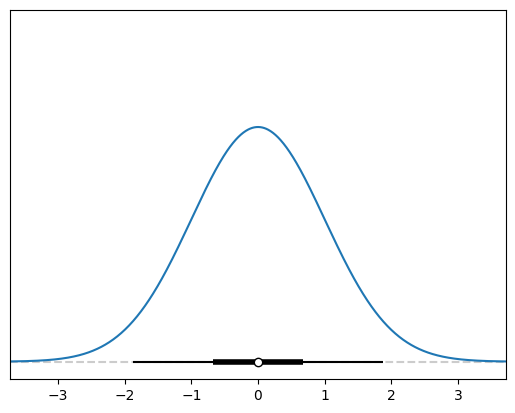

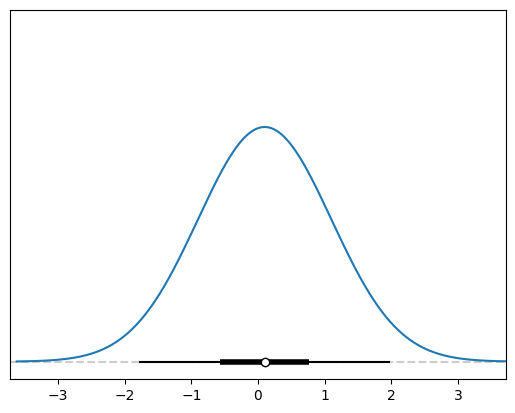

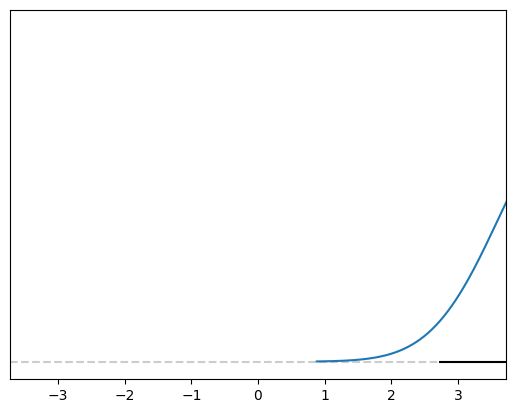

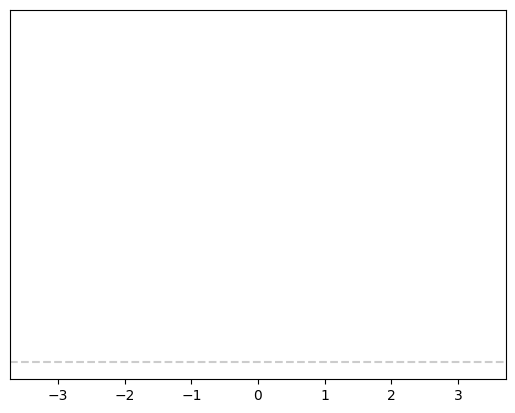

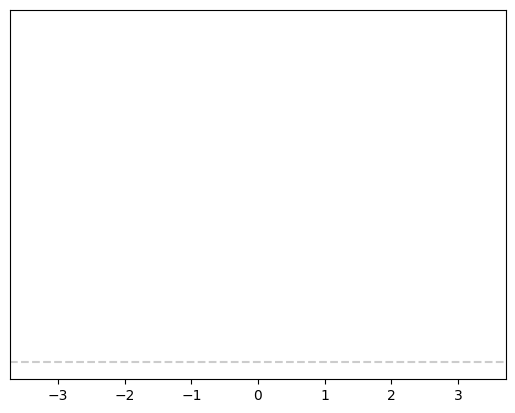

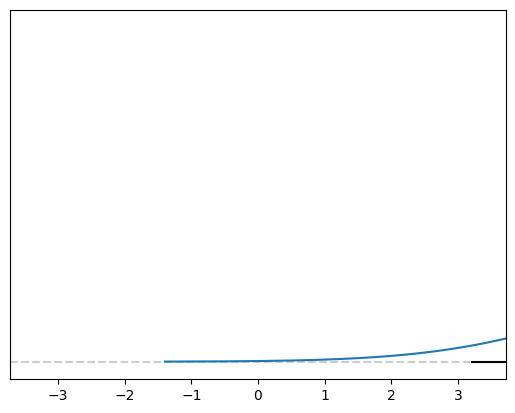

In [ ]:
pz.Normal().plot_interactive()


<Axes: >

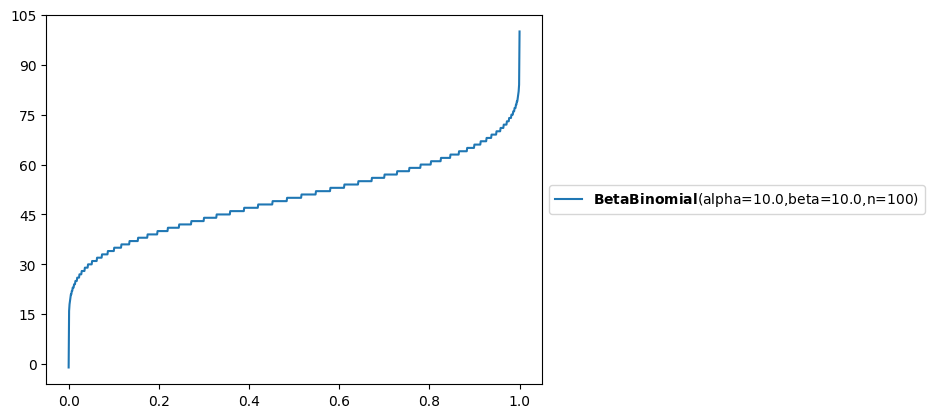

In [ ]:
pz.BetaBinomial(alpha=10, beta=10, n=100).plot_ppf()

The ppf gives us the quartile data, such as median and so on. We can see the relation between cdf and percentile, where the value of cdf corresponds to 0.01 of the ppf value

<Axes: >

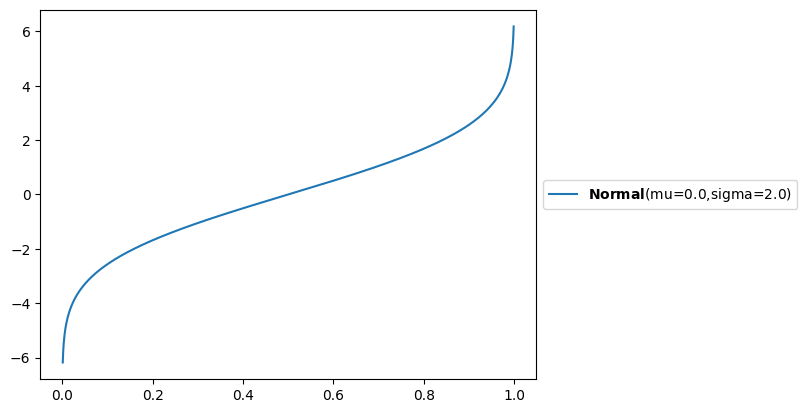

In [ ]:
pz.Normal(0,2).plot_ppf()

Q4. Use PreliZ to compute the moments for the SkewNormal distribution for a different combination of parameters. Generate random samples of different sizes,
like 10, 100, and 1,000, and see if you can recover the values of the first two moments (mean and variance) from the samples. Report your obervations.

<Axes: >

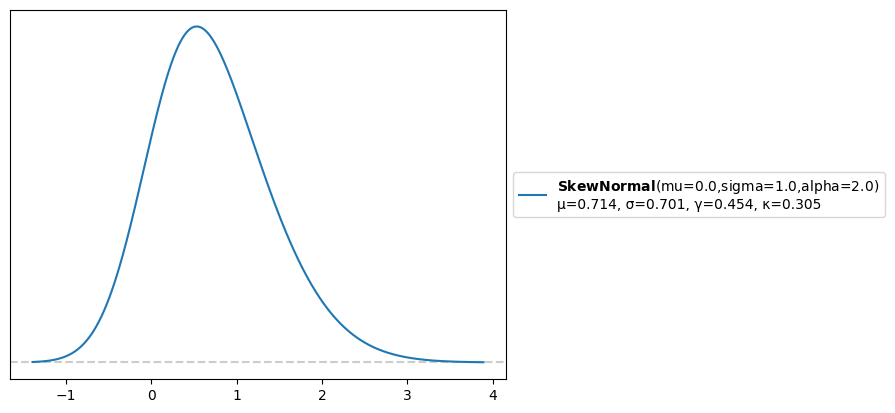

In [ ]:
pz.SkewNormal(0, 1, 2).plot_pdf(moments=["m", "d", "s", "k"])

In [ ]:
import math
from scipy.stats import skewnorm


num_samples = 1000  #10 and 100 as well
random_samples = skewnorm.rvs(2,0,1,num_samples)

mean = np.sum(random_samples)/num_samples
exp_x2 = np.sum(random_samples**2)/num_samples

variance = exp_x2 - mean**2

print(mean)
print(math.sqrt(variance))

0.6956071956176563
0.6837439922978571


We can see the estimated values of mean and sigma are close to the actual calculated in the previous block